In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [4]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#这次我们做20层
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
#结果层
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [5]:
len(model.layers)

22

In [6]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3020 - accuracy: 0.1163 - val_loss: 2.3015 - val_accuracy: 0.1564
Epoch 2/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3005 - accuracy: 0.1756 - val_loss: 2.2992 - val_accuracy: 0.1894
Epoch 3/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2971 - accuracy: 0.2026 - val_loss: 2.2946 - val_accuracy: 0.2168
Epoch 4/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2911 - accuracy: 0.2041 - val_loss: 2.2867 - val_accuracy: 0.2108
Epoch 5/100
1719/1719 [==============================] - 11s 6ms/step - loss: 2.2804 - accuracy: 0.2079 - val_loss: 2.2721 - val_accuracy: 0.2052
Epoch 6/100
1719/1719 [==============================] - 12s 7ms/step - loss: 2.2599 - accuracy: 0.2088 - val_loss: 2.2431 - val_accuracy: 0.2050
Epoch 7/100
1719/1719 [==============================] - 11s 6ms/step - loss: 2.2161 - accuracy: 0.2091 - val_loss: 2.1773 -

In [8]:
history.history

{'loss': [2.301795244216919,
  2.3001186847686768,
  2.297314405441284,
  2.292433023452759,
  2.283143997192383,
  2.262894630432129,
  2.212629556655884,
  2.036841869354248,
  1.4495418071746826,
  1.0460163354873657,
  0.8753225803375244,
  0.7641746997833252,
  0.6604467034339905,
  0.5915452241897583,
  0.55231112241745,
  0.5230306386947632,
  0.4991755187511444,
  0.4806404411792755,
  0.4640938639640808,
  0.4489271640777588,
  0.4362960457801819,
  0.42318129539489746,
  0.41245919466018677,
  0.40144655108451843,
  0.39251700043678284,
  0.38338303565979004,
  0.37607163190841675,
  0.36754998564720154,
  0.3613480031490326,
  0.3546631634235382,
  0.348928838968277,
  0.3429960310459137,
  0.336600661277771,
  0.33065706491470337,
  0.32526248693466187,
  0.32216161489486694,
  0.3160153031349182,
  0.31157323718070984,
  0.3077072501182556,
  0.302152544260025,
  0.2996540367603302,
  0.295063316822052,
  0.2905648350715637,
  0.28598761558532715,
  0.28272154927253723,
  

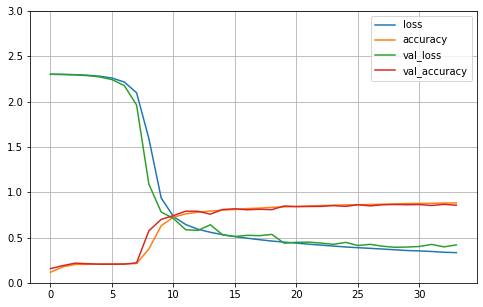

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

#如果初期变化效果不明显
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))求导，前期参数太多

In [8]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.4468655288219452, 0.8478000164031982]